<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="250" height="250">
</img>
<br>
<i><b>Docente:</b> Jhon Corredor.</i>
<br>
<i><b>Asignatura:</b> Introducción a HPC</i>
<br>
<i><b>Estudiante:</b> Mitchell Phillip Bermin Suarez</i>
<br>
<i><b>Tema:</b> Regresión lineal </i>
<br>
<i>23/11/22</i>
<br>
</FONT>
</p>

# Tabla de contenidos

1.[EDA](#eda)
* 1.1 [Columnas](#columnas)
* 1.2 [Limpieza de datos](#limpieza)
* 1.3 [Descripción del data-set](#desc)
* 1.4 [Analisis del data-set](#datos)
* 1.5 [Analisis del data-set por marca](#marca)
* 1.6 [Analisis del data-set por cilindros](#cilindros)
* 1.7 [Analisis del data-set por clase de vehiculo](#clase)
* 1.8 [Analisis del data-set de uso del combustible](#motor)

2.[Modelación de los datos](#modelacion)

*  2.1 [Relación entre variables](#variables)
* 2.2 [Regresion linear simple](#simple)
* 2.3 [Regresion linear multiple](#multiple)

3.[Conclusiones finales](#modelacionfinales)

4.[Referencias](#referencias)

#EDA <a name="eda"></a>
En este apartado se explorara las caracteristicas del dataset a travez de distribuciones estadisticas para hallar los outliers y los skewness. Tambien se remarcaran los datos relevantes para hacer las prediciones con los modelos que se propondran más adelante en el trabajo.


In [ ]:
#Importaciones
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")

#Se exporta los csv del repositorio en github
!git clone https://github.com/mitch222/parcial3.git

Cloning into 'parcial3'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


![](http://https://www.google.com/url?sa=i&url=http%3A%2F%2Fjoyreactor.com%2Ftag%2Fgif%2Fbest%2F450&psig=AOvVaw0viirU0t1DG_QCEVFfZk4W&ust=1616887773681000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIjVmL2Oz-8CFQAAAAAdAAAAABAW)

In [ ]:
#Se extrae el dataset
emissions = pd.read_csv('/content/parcial3/Datasets/CO2 Emissions_Canada.xls')
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Columnas <a name="columnas"></a>

In [ ]:
emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### Se renombran las columnas para eliminar los espacios en los nombre.  

In [ ]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
emissions.rename(renamed_col, axis='columns', inplace=True)

In [ ]:
emissions.keys()

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

##Limpieza de datos <a name="limpieza"></a>

In [ ]:
# Se revisa por valores nulos

emissions.isnull().values.any()

False

In [ ]:
# Se revisa por valores repetidos

emissions.duplicated().sum()
print('Hay un total de ' + (str(emissions.duplicated().sum()) + ' duplicados en el dataset.'))

Hay un total de 1103 duplicados en el dataset.


In [ ]:
# Se eliminan los repetidos

emissions.drop_duplicates(inplace = True)
emissions.duplicated().sum()
print('Hay un total de ' + (str(emissions.duplicated().sum()) + ' duplicados en el dataset.'))

Hay un total de 0 duplicados en el dataset.


## Descripción del dataset <a name="desc"></a>


---
Este dataset captura los detalles de como las emisiones de CO2 generadas por vehiculos, pueden variar dependiendo de:

1. Model
2. Make	
3. Engine Size(L)	
4. Cylinders
5. Fuel Type
6. Fuel Consumption City (L/100 km)
7. Fuel Consumption Hwy (L/100 km)	
8. Fuel Consumption Comb (mpg and L/100 km)
9. Vehicle class
10. Transmission

In [ ]:
emissions.describe()

,engine_size,Cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Analisis de datos <a name="datos"></a>

In [ ]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               6282 non-null   object 
 1   Model              6282 non-null   object 
 2   vehicle_class      6282 non-null   object 
 3   engine_size        6282 non-null   float64
 4   Cylinders          6282 non-null   int64  
 5   Transmission       6282 non-null   object 
 6   fuel_type          6282 non-null   object 
 7   fuel_cons_city     6282 non-null   float64
 8   fuel_cons_hwy      6282 non-null   float64
 9   fuel_cons_comb     6282 non-null   float64
 10  mpgfuel_cons_comb  6282 non-null   int64  
 11  co2                6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 638.0+ KB


In [ ]:
emissions.shape

(6282, 12)

**El dataset no presenta valores y los tipos de datos de son aptos para el analisis**  
El dataset contiene 6282 filas con 12 columnas, con datos de tipo float, int and object.

### Se realiza una copia del dataframe para mantener el original intacto en caso de tener la necesidad de comparar los datos en algun cambio.

In [ ]:
df = emissions.copy()

renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_col, axis='columns', inplace=True)

##Analisis por marca de auto <a name="marca"></a>

### Representación del la cantidad de CO2 producida tanto por marca de auto y cilindros en el motor del auto.

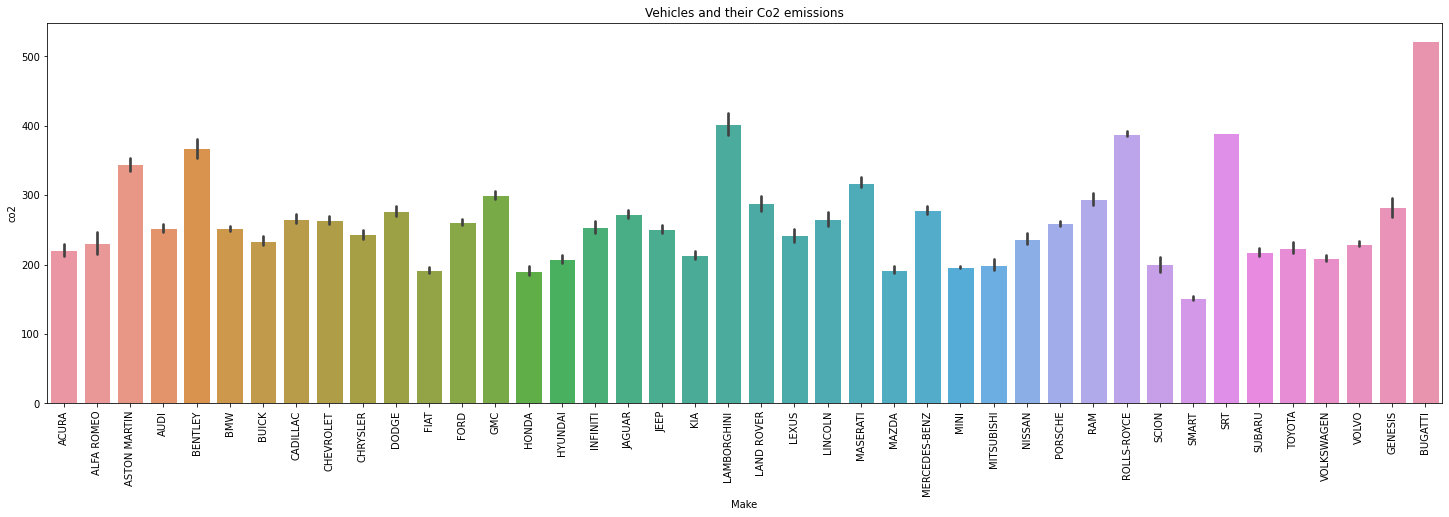

In [ ]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = emissions.Make.value_counts().sort_values()

ax = sns.barplot(data=emissions,x='Make',y='co2')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=90)
plt.show()

### Se extraen los registro con mayor cantidad de Co2 

In [ ]:
df[df.co2 == df.co2.max()]

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


###Se muestran los registros de la marca SMART

In [ ]:
df[df.Make == 'SMART']

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
943,SMART,FORTWO CABRIOLET,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147
944,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147
2072,SMART,FORTWO CABRIOLET,TWO-SEATER,1.0,3,AM5,Z,6.8,6.2,6.5,43,150
2073,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.8,6.2,6.5,43,150
3189,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,3,AM6,Z,7.5,6.1,6.9,41,157
3190,SMART,FORTWO COUPE,TWO-SEATER,0.9,3,AM6,Z,7.5,6.1,6.9,41,157
4255,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,3,AM6,Z,7.0,6.3,6.7,42,152


### Observaciones del consumo de CO2 por marca de carro

In [ ]:
fig = px.histogram(df, x="Make")
fig.update_layout(title_text='Number of Vehicles by Make',xaxis_title="Make ",yaxis_title="Number_of_vehicles ",title_x=0.5)
fig.show()

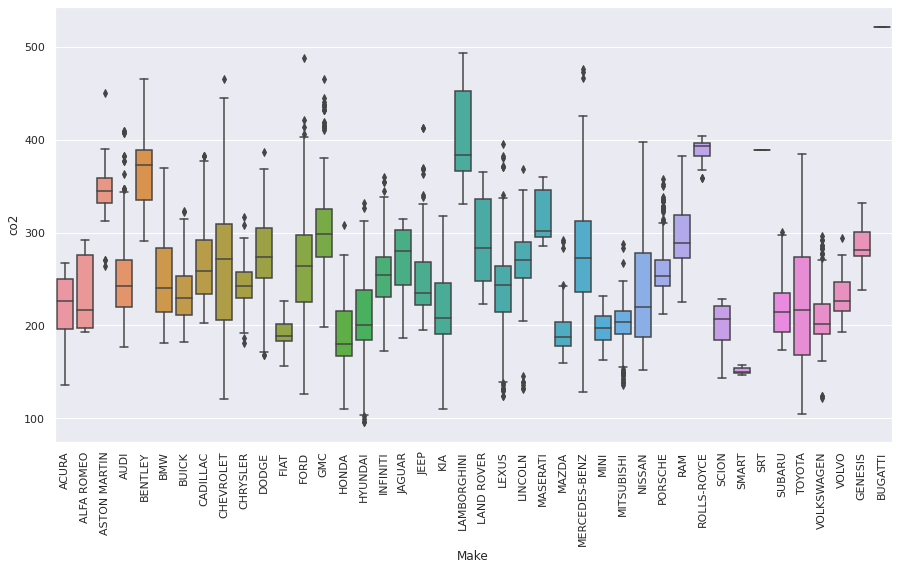

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="co2", data=df)
plt.xticks(rotation = 90)
plt.show()

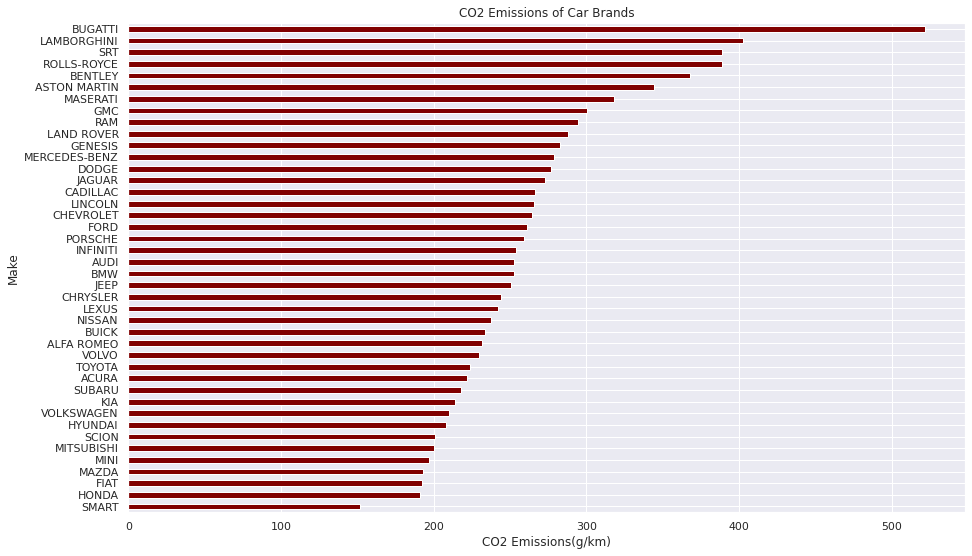

In [ ]:
plt.figure(figsize = (15,9))
df.groupby(["Make"])["co2"].mean().sort_values(ascending = True).plot.barh(color = "maroon")
plt.xlabel("CO2 Emissions(g/km)")
plt.title("CO2 Emissions of Car Brands");

In [ ]:
df.groupby('Make').mean()

,engine_size,Cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
Make,,,,,,,
ACURA,3.003922,5.254902,10.754902,8.037255,9.535294,30.156863,221.666667
ALFA ROMEO,2.221053,4.631579,11.278947,8.184211,9.852632,29.421053,231.315789
ASTON MARTIN,5.256410,10.153846,17.361538,11.625641,14.784615,19.179487,344.282051
AUDI,2.906464,5.771863,12.569962,8.645627,10.804183,26.965779,252.676806
BENTLEY,5.531429,9.942857,19.222857,11.631429,15.800000,18.142857,367.914286
BMW,3.100599,5.996008,12.543713,8.659681,10.800200,26.938124,252.514970
BUGATTI,8.000000,16.000000,26.800000,16.600000,22.200000,13.000000,522.000000
BUICK,2.495652,4.695652,11.892391,8.445652,10.333696,28.206522,233.750000
CADILLAC,3.506383,5.702128,13.411348,9.222695,11.522695,25.191489,266.141844


### Resultados del analisis
* Se encontro que el mayor emisor de Co2 en principio son los auto Buhatti, se da a enteder que la razon es la cantidad de cilindros.
* Hay indicios que la cantidad de cilindros esta relacionada con la cantidad de CO2 emitida.
* Mientras la marca Bigatti la mayor emisora de Co2, la marca SMART fue la menor.
* Todos los modelos de Rolls-Royce presentan emiciones mayores a 350 g/km.
* Las marcas de carros caros presentan una mayor produccion de Co2.

##Analisis por cilindros <a name="cilindros"></a>

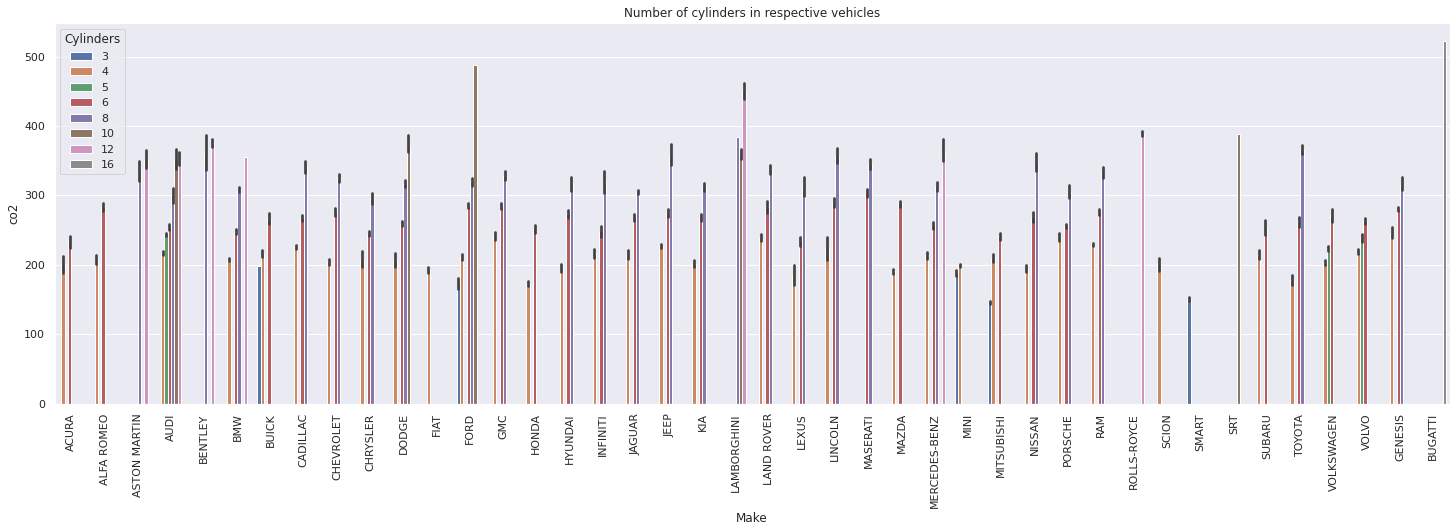

In [ ]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = emissions.Make.value_counts().sort_values()

ax = sns.barplot(data=emissions,x='Make',y='co2', hue='Cylinders')
plt.title('Number of cylinders in respective vehicles')
plt.xticks(rotation=90)
plt.show()

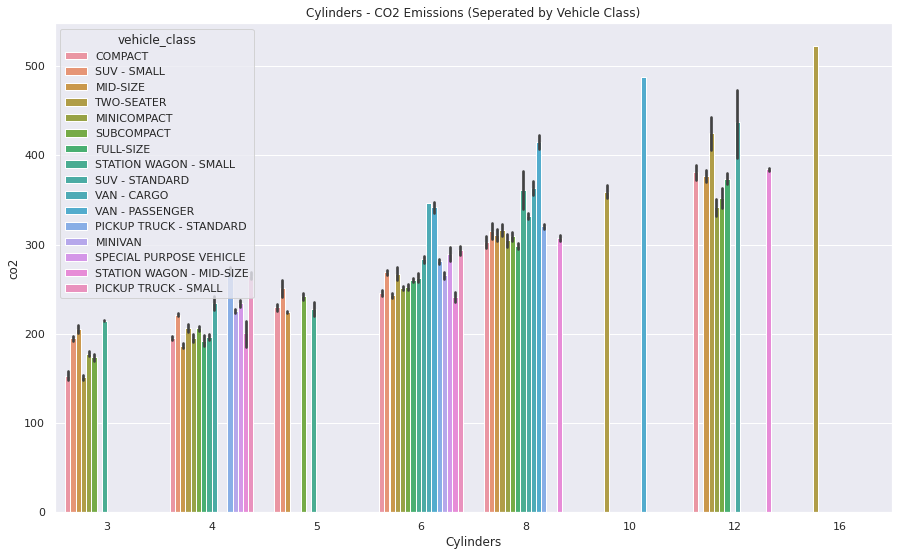

In [ ]:
plt.figure(figsize = (15,9))
sns.barplot(x = "Cylinders", y = "co2", data = df, hue = "vehicle_class")
plt.title("Cylinders - CO2 Emissions (Seperated by Vehicle Class)");

In [ ]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles',xaxis_title="Cylinders ",yaxis_title="Number_of_vehicles ",title_x=0.5)
fig.show()

In [ ]:
df[df["Cylinders"] == 16].Make

4509    BUGATTI
5575    BUGATTI
Name: Make, dtype: object

In [ ]:
df.Cylinders.value_counts(normalize=True)

4     0.437599
6     0.324737
8     0.191340
12    0.021490
3     0.014008
10    0.006367
5     0.004139
16    0.000318
Name: Cylinders, dtype: float64

In [ ]:
df.Cylinders.value_counts()

4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: Cylinders, dtype: int64

### Analisis de resultados

* Un 43.5% de los carros tienen 4 cilindros seguido de los carros con 6 cilindros. Solamente 3 carros presentan 16 cilindros.
* Se presenta una relacion directamente propocional entre numero de cilindros y cantidad de Co2 producido.
* Los autos con mayor numeros de cilindros son los minicompact.

##Analisis por clase de auto <a name="clase"></a>

Text(0.5, 1.0, 'CO2 Emissions for Vehicle Classes')

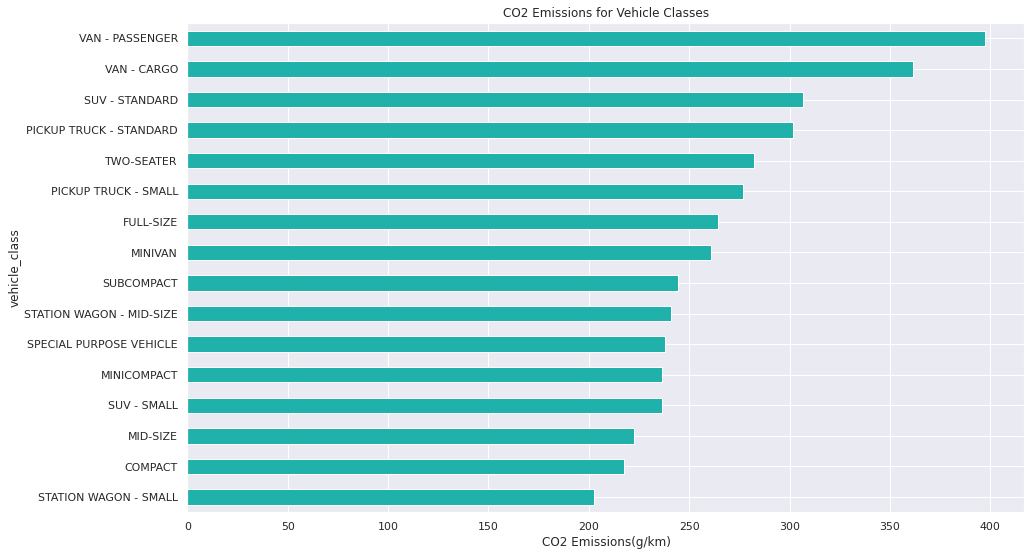

In [ ]:
plt.figure(figsize = (15,9))
ax = df.groupby(["vehicle_class"])["co2"].mean().sort_values(ascending = 
                                                                        True).plot.barh(color = "lightseagreen")
                                                              
plt.xlabel("CO2 Emissions(g/km)")
plt.title("CO2 Emissions for Vehicle Classes")

In [ ]:
df_Vehicle_Class=df['vehicle_class'].value_counts().reset_index().rename(columns={'index':'vehicle_class','vehicle_class':'Count'})
fig = go.Figure(go.Bar(
    x=df_Vehicle_Class['vehicle_class'],y=df_Vehicle_Class['Count'],
    marker={'color': df_Vehicle_Class['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Vehicle_Class['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='vehicle_class',xaxis_title="vehicle_class",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

### Resultados del analisis
* Se encontro que el mayor emisor en promedio de Co2 dependiendo la clase del vehiculo son las vans de pasajeros.
* Los tres tipos de carros mas comunes (SUV-SMALL, MID-SIZE, COMPACT) son de los que menos producen Co2.

##Analisis de uso del combustible <a name="motor"></a>

### Tipo de combustible

In [ ]:
df_Fuel_Type=df['fuel_type'].value_counts().reset_index().rename(columns={'index':'fuel_type','fuel_type':'Count'})

fig = go.Figure(go.Bar(
    x=df_Fuel_Type['fuel_type'],y=df_Fuel_Type['Count'],
    marker={'color': df_Fuel_Type['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Fuel_Type['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Fuel Type Distribution ',xaxis_title="Fuel Type  ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [ ]:
city=df.fuel_cons_city
highway = df.fuel_cons_hwy
city_hwy_df = df[['fuel_cons_city', 'fuel_cons_hwy', 'fuel_type','co2']]

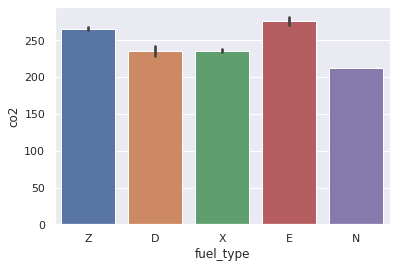

In [ ]:
sns.barplot(df["fuel_type"],df["co2"])

### Combustible consumido en ciudad y carretera

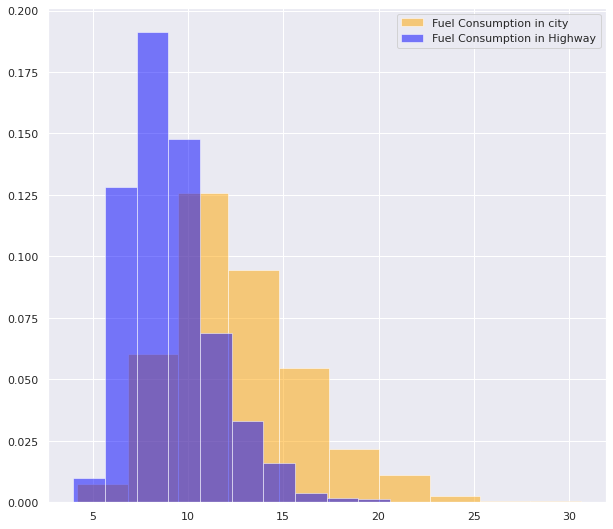

In [ ]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(city, color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(highway, color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend()
plt.show()

In [ ]:
fig = go.Figure(data=go.Violin(y=df["fuel_cons_city"],
                               box_visible=True,
                               line_color='white',
                               meanline_visible=True,
                               fillcolor='blue', opacity=0.4,
                               x0='Fuel Consumption City'))

fig.show()

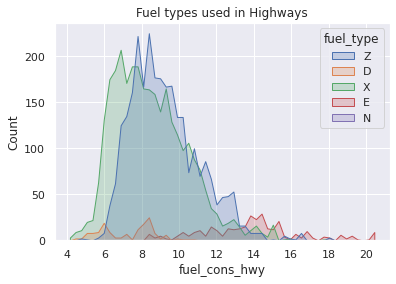

In [ ]:
sns.histplot(city_hwy_df, x="fuel_cons_hwy", hue="fuel_type", element="poly")
plt.title('Fuel types used in Highways')
plt.show()

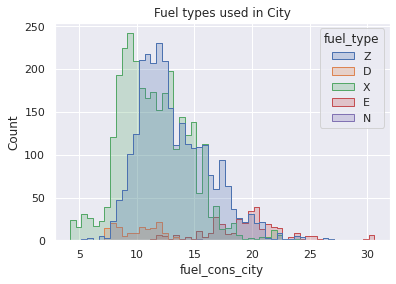

In [ ]:
sns.histplot(city_hwy_df, x="fuel_cons_city", hue="fuel_type", element="step")
plt.title('Fuel types used in City')
plt.show()

### Distribución de la comsuncion de combustibles combinados en C in (L/100km)  y mpg.

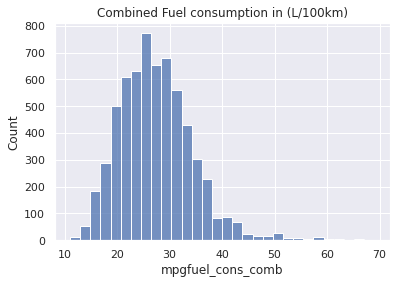

In [ ]:
sns.histplot(data=df, x="mpgfuel_cons_comb", bins=30)
plt.title('Combined Fuel consumption in (L/100km)')
plt.show()

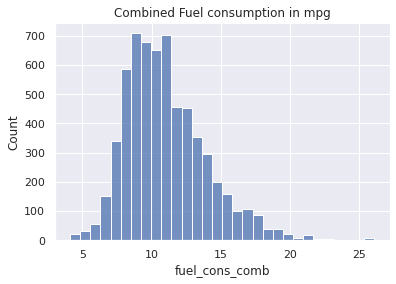

In [ ]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Combined Fuel consumption in mpg')
plt.show()

### Resultados del analisis
* Los combustibles de tipo Z y X son los más dominantes tanto en carretera como en ciudades.
* El consumo de combustible es mayor eu carretera que en la ciudad.
* El combustible E es el que produce una mayor cantidad de Co2.
* Una gran cantidad de vehiculos presentan una mezcla de combustibles.

#Modelación de los datos<a name="modelacion"></a>

## Correlación entre las variables establecidas

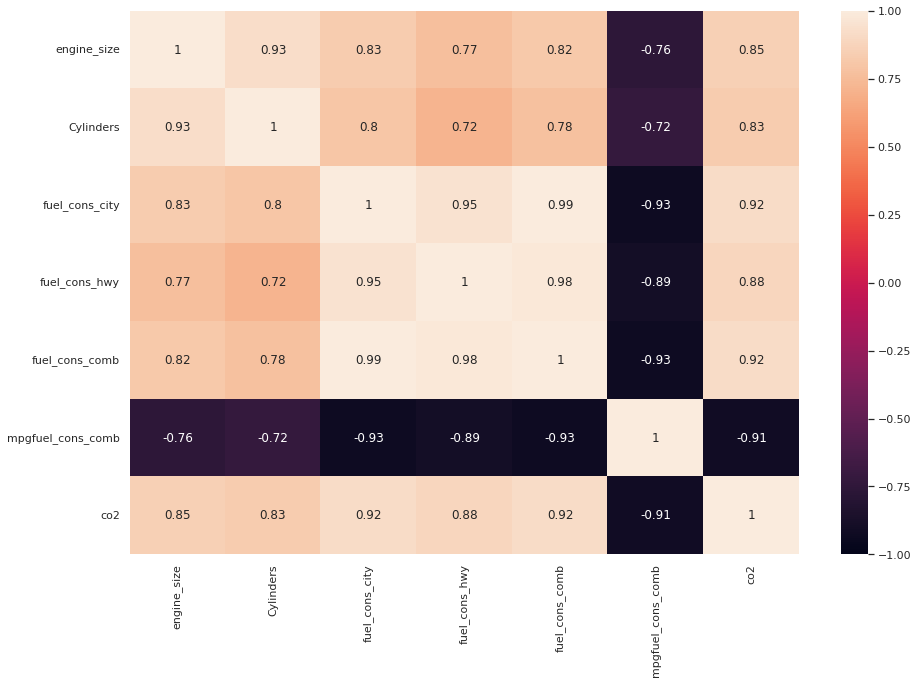

In [ ]:
# Analysing the correlation between all variables

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

## Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
slr = LinearRegression()

In [ ]:
y_col = "co2"

X = df.drop(y_col, axis=1)
y = df[y_col]

In [ ]:
X = df[['engine_size']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split into train and test parts

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
slr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = slr.predict(X_test_s)

In [ ]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

R2 score is 0.67815773188647
Residual sum of squares (MSE): 880.28


### 65% accuracy

## Multiple Linear Regression

In [ ]:
mlr = LinearRegression()
X = df[['engine_size', 'Cylinders', 'fuel_cons_comb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [ ]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is 0.8492683070460795
Residual sum of squares (MSE): 462.81


In [ ]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 8.35469433 11.61515223 38.62607186]
Intercept is 251.34109452736323


### We trained upto 86% accurately predicting model

#Conclusiones finales

* Se pudo observar que el modelo propuesto mediante la regresión multiple fue lo suficientemente confiable para su uso.
* Los datos seleccionados presentan una significancia a la hora de realizar el analisis.
* Los datos examinados son una representación de la realidad por lo cual lo resultados del EDA tienen sentido con la actualidad.
* Como era de esperarse la seleccion de un modelos de regresión multiple es la mejor opción para datos directamente proporcionales y multiples variables dependientes.

#Referencias

* CO2 Emission by Vehicles. (2022). Retrieved 19 November 2022, from https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
* Badole, M. (2021). Multiple Linear Regression Using Python and Scikit-learn. Retrieved 19 November 2022, from https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

* portfolio/HypothesisTest_CorrelationAnalysis_LinearRegression - Report Zilma Bezerra.pdf at f5fa3809ba4c5935f25588dfc61819dca8eb48f5 · zilmabezerra/portfolio. (2022). Retrieved 19 November 2022, from https://github.com/zilmabezerra/portfolio/blob/f5fa3809ba4c5935f25588dfc61819dca8eb48f5/Hypothesis%20Test,%20Correlation%20Analysis%20and%20Linear%20Regression/HypothesisTest_CorrelationAnalysis_LinearRegression%20-%20Report%20Zilma%20Bezerra.pdf 

* Triola, M.F. (2012). Elementary Statistics. Iternational Edition ed. Boston: Pearson
Education, Inc.